In [21]:
#Find the locations of N brothers in a circle in a way 
#that the minimum distance between each pair of brothers is maximum
#maximize(xi,yi) j = r
#such that:
#          (xi - xj)^2 + (yi - yj)^2 >= r^2
#          (xi - R)^2 + (yi - R)^2 <= R^2

In [22]:
from pyomo.environ import *
import matplotlib.pyplot as plt
import numpy as np
import random

In [23]:
model = AbstractModel()
model.N = Param(mutable=True)
model.i = RangeSet(1, model.N)
model.j = Set(initialize=model.i)
model.R = Param(mutable=True)

def initval(model, i):
    return random.uniform(0,1)

model.x = Var(model.i, bounds=(0,2*model.R), within=NonNegativeReals, initialize= initval)
model.y = Var(model.i, bounds=(0,2*model.R), within=NonNegativeReals, initialize= initval)
model.r = Var(within=NonNegativeReals)

def C1_rule(model,i,j):
    if i!=j:
        return (model.x[i]-model.x[j])**2 + (model.y[i] - model.y[j])**2 >= model.r**2
    else:
        return Constraint.Skip
model.C1 = Constraint(model.i, model.j, rule=C1_rule)

def C2_rule(model,i):
    return (model.x[i] - model.R)**2 + (model.y[i] - model.R)**2 <= model.R**2
model.C2 = Constraint(model.i, rule=C2_rule)

model.obj = Objective(expr = model.r, sense=maximize)
opt = SolverFactory('ipopt')
#instance.display()

In [24]:
#instance = model.create_instance("Ex22.dat")
model.R = 1
model.N = 20
instance = model.create_instance()
results = opt.solve(instance) # solves and updates instance

    mutable Param).  The linkage between this RangeSet and the original source
    data will be broken, so updating the data value in the future will not be
    reflected in this RangeSet.  To suppress this warning, explicitly convert
    the source data to a constant type (e.g., float, int, or immutable Param)


Min distance is  0.485


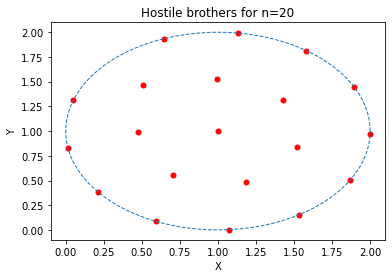

In [25]:
X = [value(instance.x[i]) for i in instance.i]
Y = [value(instance.y[i]) for i in instance.i]
plt.scatter(X, Y, s=25, color='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Hostile brothers for n=' + str(value(instance.N)))
theta = np.linspace(0, 2*np.pi, 100)
Xc = value(instance.R) + value(instance.R)*np.cos(theta)
Yc = value(instance.R) + value(instance.R)*np.sin(theta)
plt.plot(Xc,Yc, '--', lw=1)
print('Min distance is ', round(value(instance.r), 3))